# url: https://qiita.com/nekoumei/items/648726e89d05cba6f432

In [1]:
!pip install causalimpact

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from causalimpact import CausalImpact
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## (2) John Snowデータの読み込み
Data from Table.12 in Snow(1855)  
http://www.ph.ucla.edu/epi/snow/table12a.html  

In [3]:
## 1849年におけるエリア毎のコレラによる死者数
### Southwark and Vauxhall Company
sv1849 = [283,157,192,249,259,226,352,97,111,8,235,92]

### Lambeth Company & Southwark and Vauxhall Company
lsv1849 = [256,267,312,257,318,446,143,193,243,215,544,187,153,81,113,176]

## 1849年におけるエリア毎のコレラによる死者数
### Southwark and Vauxhall Company
sv1854 = [371, 161, 148, 362, 244, 237, 282, 59, 171, 9, 240, 174]

### Lambeth Company & Southwark and Vauxhall Company
lsv1854 = [113,174,270,93,210,388,92,58,117,49,193,303,142,48,165,132]

## コレラの死者数を会社ごとにまとめる
sv_death = sv1849 + sv1854
lsv_death = lsv1849 + lsv1854

## どのデータがどのエリアのものか
sv_area = [f'sv_{i}' for i in range(1, len(sv1849)+1)] + [f'sv_{i}' for i in range(1, len(sv1854)+1)]
lsv_area = [f'lsv_{i}' for i in range(1, len(lsv1849)+1)] + [f'lsv_{i}' for i in range(1, len(lsv1854)+1)]

## どのデータがどの年のものか
sv_year = [1849 for i in range(0, len(sv1849))] + [1854 for i in range(0, len(sv1854))]
lsv_year = [1849 for i in range(0, len(lsv1849))] + [1854 for i in range(0, len(lsv1854))]

## Southwark & Vauxhallのデータフレームを作成
sv = pd.DataFrame({
    'area': sv_area,
    'year': sv_year,
    'death': sv_death,
    'LSV': 0,
    'company': 'Southwark and Vauxhall'
})

## Lambeth & Southwark and Vauxhallのデータフレームを作成
lsv = pd.DataFrame({
    'area': lsv_area,
    'year': lsv_year,
    'death': lsv_death,
    'LSV': 1,
    'company': 'Lambeth & Southwark and Vauxhall'
})

## 地域・年別のデータセットの作成
JS_df = pd.concat([sv, lsv], ignore_index=True)

## 会社別のデータセットを作成
JS_sum = JS_df.groupby(['company', 'LSV', 'year'], as_index=False, dropna = False).death.sum()

In [4]:
sv

,area,year,death,LSV,company
0,sv_1,1849,283,0,Southwark and Vauxhall
1,sv_2,1849,157,0,Southwark and Vauxhall
2,sv_3,1849,192,0,Southwark and Vauxhall
3,sv_4,1849,249,0,Southwark and Vauxhall
4,sv_5,1849,259,0,Southwark and Vauxhall
5,sv_6,1849,226,0,Southwark and Vauxhall
6,sv_7,1849,352,0,Southwark and Vauxhall
7,sv_8,1849,97,0,Southwark and Vauxhall
8,sv_9,1849,111,0,Southwark and Vauxhall
9,sv_10,1849,8,0,Southwark and Vauxhall


In [5]:
lsv

,area,year,death,LSV,company
0,lsv_1,1849,256,1,Lambeth & Southwark and Vauxhall
1,lsv_2,1849,267,1,Lambeth & Southwark and Vauxhall
2,lsv_3,1849,312,1,Lambeth & Southwark and Vauxhall
3,lsv_4,1849,257,1,Lambeth & Southwark and Vauxhall
4,lsv_5,1849,318,1,Lambeth & Southwark and Vauxhall
5,lsv_6,1849,446,1,Lambeth & Southwark and Vauxhall
6,lsv_7,1849,143,1,Lambeth & Southwark and Vauxhall
7,lsv_8,1849,193,1,Lambeth & Southwark and Vauxhall
8,lsv_9,1849,243,1,Lambeth & Southwark and Vauxhall
9,lsv_10,1849,215,1,Lambeth & Southwark and Vauxhall


In [6]:
JS_df

,area,year,death,LSV,company
0,sv_1,1849,283,0,Southwark and Vauxhall
1,sv_2,1849,157,0,Southwark and Vauxhall
2,sv_3,1849,192,0,Southwark and Vauxhall
3,sv_4,1849,249,0,Southwark and Vauxhall
4,sv_5,1849,259,0,Southwark and Vauxhall
5,sv_6,1849,226,0,Southwark and Vauxhall
6,sv_7,1849,352,0,Southwark and Vauxhall
7,sv_8,1849,97,0,Southwark and Vauxhall
8,sv_9,1849,111,0,Southwark and Vauxhall
9,sv_10,1849,8,0,Southwark and Vauxhall


In [7]:
JS_sum

,company,LSV,year,death
0,Lambeth & Southwark and Vauxhall,1,1849,3904
1,Lambeth & Southwark and Vauxhall,1,1854,2547
2,Southwark and Vauxhall,0,1849,2261
3,Southwark and Vauxhall,0,1854,2458


## (3) 集計と可視化による分析


In [8]:
## 集計による推定
JS_grp_summary = JS_sum.pivot_table(
    values='death', index=['company', 'LSV'], columns=['year'], aggfunc='sum').add_prefix('year_').reset_index()
JS_grp_summary['gap'] = JS_grp_summary.year_1854 - JS_grp_summary.year_1849
JS_grp_summary['gap_rate'] = JS_grp_summary.year_1854 / JS_grp_summary.year_1849 - 1
JS_grp_summary

year,company,LSV,year_1849,year_1854,gap,gap_rate
0,Lambeth & Southwark and Vauxhall,1,3904,2547,-1357,-0.347592
1,Southwark and Vauxhall,0,2261,2458,197,0.087130


In [9]:
## 集計による推定(log)
JS_grp_summary_ln = JS_sum.pivot_table(
    values='death', index=['company', 'LSV'], columns=['year'], aggfunc='sum').add_prefix('year_').reset_index()
JS_grp_summary_ln.year_1849 = np.log(JS_grp_summary_ln.year_1849)
JS_grp_summary_ln.year_1854 = np.log(JS_grp_summary_ln.year_1854)
JS_grp_summary_ln['gap'] = JS_grp_summary_ln.year_1854 - JS_grp_summary_ln.year_1849
JS_grp_summary_ln['gap_rate'] = JS_grp_summary_ln.year_1854 / JS_grp_summary_ln.year_1849 - 1
JS_grp_summary_ln

year,company,LSV,year_1849,year_1854,gap,gap_rate
0,Lambeth & Southwark and Vauxhall,1,8.269757,7.842671,-0.427085,-0.051644
1,Southwark and Vauxhall,0,7.723562,7.807103,0.083541,0.010816


logを適用することによって、データの変動を対数スケールで扱います。このような変換は、特にデータの変動が大きく、異常値（外れ値）がある場合などに有用です。以下に、なぜ対数変換が行われるかやその効果について説明します。

### 変動の緩和（Scaling down variability）:

生データが極端に大きな値を持つ場合、そのままでは異常値の影響が強くなり、統計的な手法がうまく機能しづらくなります。log変換によってデータの変動が抑えられ、異常値の影響が緩和されることがあります。

### 正規分布への近似:

いくつかの統計的手法は、データが正規分布に従っていることを前提としています。log変換は、正規分布に従うデータに近づける効果があります。これにより、統計的な仮定を満たすデータを得ることができます。

### 比率の対数化:

2つの変数の比率が重要な場合、その比率を対数変換すると、変数の比率が差として表現され、分析が容易になります。上記のコードでは、gap_rateが対数変換されています。

### 推定量の安定性:

分散が均一でない場合、対数変換によって分散を均一化する効果があります。これによって、推定量の安定性が向上することがあります。

要するに、log変換は異常値の影響を緩和し、正規分布への近似を促進し、比率の対数化を可能にし、推定量の安定性を向上させるなど、統計的手法を適用する上で有益な効果があります。ただし、データの特性や分析の目的によっては、log変換が適切でない場合もあります。

## plotly expressによる可視化

In [10]:
fig = px.scatter(JS_sum, x='year', y='death', color='company', trendline="ols", symbol='company', title='4.2 コレラによる死者数')
# 補助線を追加していく
fig.add_trace(go.Scatter(
    x=[1849, 1854],
    y=[3904, 3904 + 197],
    mode="lines",
    line=dict(color='gray', dash='dot'),
    name=''
))
fig.add_trace(go.Scatter(
    x=[1849, 1854],
    y=[3904, 3904],
    mode="lines",
    line=dict(color='gray', dash='dot'),
    name=''
))
fig.add_trace(go.Scatter(
    x=[1849, 1854],
    y=[2261, 2261],
    mode="lines",
    line=dict(color='gray', dash='dot'),
    name=''
))
fig.add_trace(go.Scatter(
    x=[1854.2, 1854.2],
    y=[2261, 2458],
    mode="lines+markers",
    line=dict(color='gray', width=1),
    name='',
))
fig.add_trace(go.Scatter(
    x=[1854.2],
    y=[2350],
    mode="text",
    name='',
    text='(1)',
    textposition='middle right'
))
fig.add_trace(go.Scatter(
    x=[1854.2, 1854.2],
    y=[3904, 3904+197],
    mode="lines+markers",
    line=dict(color='gray', width=1),
    name='',
))
fig.add_trace(go.Scatter(
    x=[1854.2],
    y=[3904+99],
    mode="text",
    name='',
    text='(2)',
    textposition='middle right'
))
fig.add_trace(go.Scatter(
    x=[1854.2, 1854.2],
    y=[2547, 3904],
    mode="lines+markers",
    line=dict(color='gray', width=1),
    name=''
))
fig.add_trace(go.Scatter(
    x=[1854.2],
    y=[3200],
    mode="text",
    name='',
    text='(3)',
    textposition='middle right'
))

In [11]:
fig.write_html('ch4_plot1.html', auto_open=False)

## (4) 回帰分析を用いたDID

In [12]:
## Difference in Difference
JS_did = JS_sum.copy()
JS_did['D1854'] = JS_did.year.apply(lambda x: 1 if x == 1854 else 0)
JS_did['D1854_LSV'] = JS_did.D1854 * JS_did.LSV

y = JS_did.death
X = JS_did[['LSV', 'D1854', 'D1854_LSV']]
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
coef = results.summary().tables[1]
coef

,coef,std err,t,P>|t|,[0.025,0.975]
const,2261.0000,inf,0,nan,nan,nan
LSV,1643.0000,inf,0,nan,nan,nan
D1854,197.0000,inf,0,nan,nan,nan
D1854_LSV,-1554.0000,inf,-0,nan,nan,nan


In [13]:
## Difference in Difference(log)
JS_did_log = JS_sum.copy()
JS_did_log['D1854'] = JS_did_log.year.apply(lambda x: 1 if x == 1854 else 0)
JS_did_log['D1854_LSV'] = JS_did_log.D1854 * JS_did_log.LSV

y = np.log(JS_did_log.death)
X = JS_did_log[['LSV', 'D1854', 'D1854_LSV']]
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
coef = results.summary().tables[1]
coef

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.7236,inf,0,nan,nan,nan
LSV,0.5462,inf,0,nan,nan,nan
D1854,0.0835,inf,0,nan,nan,nan
D1854_LSV,-0.5106,inf,-0,nan,nan,nan


In [14]:
## Difference in Difference(エリア単位)
JS_did_area = JS_df.copy()
JS_did_area['D1854'] = JS_did_area.year.apply(lambda x: 1 if x == 1854 else 0)
JS_did_area['D1854_LSV'] = JS_did_area.D1854 * JS_did_area.LSV

y = JS_did_area.death
X = pd.get_dummies(JS_did_area[['LSV', 'area', 'D1854', 'D1854_LSV']], columns=['area'], drop_first=True)
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
coef = results.summary().tables[1]
coef = pd.read_html(coef.as_html(), header=0, index_col=0)[0]
coef.iloc[:4]

,coef,std err,t,P>|t|,[0.025,0.975]
const,177.7076,15.710,11.312,0.000,145.415,210.000
LSV,49.1987,44.773,1.099,0.282,-42.833,141.230
D1854,16.4167,25.365,0.647,0.523,-35.721,68.555
D1854_LSV,-101.2292,33.554,-3.017,0.006,-170.201,-32.257


In [15]:
## Difference in Difference(州単位、log)
JS_did_area_log = JS_df.copy()
JS_did_area_log['D1854'] = JS_did_area_log.year.apply(lambda x: 1 if x == 1854 else 0)
JS_did_area_log['D1854_LSV'] = JS_did_area_log.D1854 * JS_did_area_log.LSV

y = np.log(JS_did_area_log.death)
X = pd.get_dummies(JS_did_area_log[['LSV', 'area', 'D1854', 'D1854_LSV']], columns=['area'], drop_first=True)
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
coef = results.summary().tables[1]
coef = pd.read_html(coef.as_html(), header=0, index_col=0)[0]
coef.iloc[:4]

,coef,std err,t,P>|t|,[0.025,0.975]
const,4.6461,0.082,56.393,0.000,4.477,4.815
LSV,0.7363,0.235,3.136,0.004,0.254,1.219
D1854,0.0739,0.133,0.556,0.583,-0.200,0.347
D1854_LSV,-0.5661,0.176,-3.217,0.003,-0.928,-0.204


## (7) Proposition99の分析：集計による分析

### データの用意
Rパッケージのデータセットをrpy2経由で取得するか、元データをローカルに保存しておくかの2通り記載する。

### 1. rpy2を経由してRパッケージEcdatから取得する
(事前にRにEcdatを下記のようにしてインストールする)
```
sudo R
install.packages('Ecdat')
```

In [16]:
# from rpy2.robjects import r, pandas2ri
# from rpy2.robjects.packages import importr
# pandas2ri.activate()

In [17]:
# importr('Ecdat')
# importr('tidyverse')
# ### Common Trend Assumptionの為に分析から特定の州を外す
# ### タバコの税金が1988年以降50セント以上上がった州のリスト
# ### Alaska, Hawaii, Maryland, Michigan, New Jersey, New York, Washington
# r('skip_state <- c(3,9,10,22,21,23,31,33,48)')
# ### Cigarデータセットの読み込み
# ### skip_stateに含まれる州のデータを削除
# cigar = r('''Cigar <- Cigar %>%
#   filter(!state %in% skip_state,
#          year >= 70) %>%
#   mutate(area = if_else(state == 5, "CA", "Rest of US"))''')

### 2. 元データをローカルに保存して読み込む
EcdatのCRANのドキュメントを確認する(https://cran.r-project.org/web/packages/Ecdat/Ecdat.pdf )と、  
Cigarデータセットは (https://www.wiley.com/legacy/wileychi/baltagi/ )が元であることが分かる。  
いくつかデータセットがあるが、Cigarにあたるのは右記 https://www.wiley.com/legacy/wileychi/baltagi/supp/Cigar.txt  
URLから直接pd.read_csvや、requests.getしてもうまくいかない（おそらく弾いてると思われる）ので、テキストをコピペして  
ローカルに保存しておく。(下記の場合は `../data/cigar.txt`に保存している)  
※1行目および最終行に空行があるので事前に消しておく

In [18]:
cigar = pd.read_csv(
    '/content/Cigar.txt',
    header=None,
    sep='\s',
    names=['state', 'year', 'price', 'pop', 'pop16', 'cpi', 'ndi', 'sales','pimin']
)

skip_state = [3,9,10,22,21,23,31,33,48]
cigar = cigar[(~cigar['state'].isin(skip_state)) & (cigar['year'] >= 70)].reset_index(drop=True)
cigar['area'] = cigar['state'].apply(lambda x: 'CA' if x==5 else 'Rest of US')

In [19]:
cigar

,state,year,price,pop,pop16,cpi,ndi,sales,pimin,area
0,1,70,39.6,3444.0,2394.6,38.8,2591.039159,89.8,34.3,Rest of US
1,1,71,42.7,3481.0,2443.5,40.5,2785.315971,95.4,35.8,Rest of US
2,1,72,42.3,3511.0,2484.7,41.8,3034.808297,101.1,37.4,Rest of US
3,1,73,42.1,3540.0,2526.0,44.4,3387.574086,102.9,37.3,Rest of US
4,1,74,43.1,3574.0,2573.9,49.3,3718.867175,108.2,41.4,Rest of US
...,...,...,...,...,...,...,...,...,...,...
846,51,88,112.9,479.0,353.0,118.3,11803.000000,114.3,115.3,Rest of US
847,51,89,118.6,475.0,352.0,124.0,12399.000000,111.4,123.0,Rest of US
848,51,90,129.5,470.9,348.9,130.7,13871.000000,96.9,138.9,Rest of US
849,51,91,127.0,477.1,355.2,136.2,14675.000000,109.1,143.6,Rest of US


## 前後比較による分析

In [20]:
cigar_did = cigar.copy()
cigar_did['period'] = cigar_did.year.apply(lambda x: 'after' if x > 87 else 'before')
cigar_did['state'] = cigar_did.state.apply(lambda x: 'CA' if x==5 else 'Rest of US')
cigar_did['sales_pop16'] = cigar_did['sales'] * cigar_did['pop16']
summarised = cigar_did.groupby(['period', 'state'], as_index=False)['pop16', 'sales_pop16'].mean().sort_values('period', ascending=False)
summarised['sales'] = summarised.sales_pop16 / summarised.pop16

In [21]:
cigar_did

,state,year,price,pop,pop16,cpi,ndi,sales,pimin,area,period,sales_pop16
0,Rest of US,70,39.6,3444.0,2394.6,38.8,2591.039159,89.8,34.3,Rest of US,before,215035.08
1,Rest of US,71,42.7,3481.0,2443.5,40.5,2785.315971,95.4,35.8,Rest of US,before,233109.90
2,Rest of US,72,42.3,3511.0,2484.7,41.8,3034.808297,101.1,37.4,Rest of US,before,251203.17
3,Rest of US,73,42.1,3540.0,2526.0,44.4,3387.574086,102.9,37.3,Rest of US,before,259925.40
4,Rest of US,74,43.1,3574.0,2573.9,49.3,3718.867175,108.2,41.4,Rest of US,before,278495.98
...,...,...,...,...,...,...,...,...,...,...,...,...
846,Rest of US,88,112.9,479.0,353.0,118.3,11803.000000,114.3,115.3,Rest of US,after,40347.90
847,Rest of US,89,118.6,475.0,352.0,124.0,12399.000000,111.4,123.0,Rest of US,after,39212.80
848,Rest of US,90,129.5,470.9,348.9,130.7,13871.000000,96.9,138.9,Rest of US,after,33808.41
849,Rest of US,91,127.0,477.1,355.2,136.2,14675.000000,109.1,143.6,Rest of US,after,38752.32


In [22]:
summarised

,period,state,pop16,sales_pop16,sales
2,before,CA,17674.250000,2.061836e+06,116.657645
3,before,Rest of US,2605.420216,3.304769e+05,126.842072
0,after,CA,22355.320000,1.724154e+06,77.124997
1,after,Rest of US,2948.603889,3.151694e+05,106.887669


In [23]:
fig = px.scatter(summarised, x='period', y='sales', color='state', symbol='state', title='4.5 タバコの売上の前後比較')

fig.add_trace(go.Scatter(
    x=['before', 'after'],
    y=[126.842072, 106.887669],
    mode="lines",
    line=dict(color='gray', dash='dot'),
    name=''
))

fig.add_trace(go.Scatter(
    x=['before', 'after'],
    y=[116.657645, 77.124997],
    mode="lines",
    line=dict(color='gray', dash='dot'),
    name=''
))

fig.show()

In [24]:
fig.write_html('ch4_plot2.html', auto_open=False)

## タバコの売上のトレンドを示すプロット

In [25]:
sales_trend = cigar_did.groupby(['year', 'state'], as_index=False)['pop16', 'sales_pop16'].mean()
sales_trend['sales'] = sales_trend.sales_pop16 / sales_trend.pop16

In [26]:
sales_trend

,year,state,pop16,sales_pop16,sales
0,70,CA,14317.600000,1.761065e+06,123.000000
1,70,Rest of US,2268.744444,2.609811e+05,115.033284
2,71,CA,14670.500000,1.775130e+06,121.000000
3,71,Rest of US,2319.763889,2.740049e+05,118.117568
4,72,CA,14938.300000,1.844880e+06,123.500000
5,72,Rest of US,2360.625000,2.852985e+05,120.857179
6,73,CA,15243.700000,1.896316e+06,124.400000
7,73,Rest of US,2397.583333,2.944700e+05,122.819500
8,74,CA,15566.600000,1.972288e+06,126.700000
9,74,Rest of US,2434.127778,3.089893e+05,126.940448


In [27]:
fig = px.line(sales_trend, x='year', y='sales', color='state', title='4.6 売上のトレンドの確認')
fig.show()

In [28]:
fig.write_html('ch4_plot3.html', auto_open=False)

## (8) DIDのためのデータを準備

In [29]:
cigar['post'] = cigar.year.apply(lambda x: 1 if x > 87 else 0)
cigar['ca'] = cigar.state.apply(lambda x: 1 if x == 5 else 0)
cigar['sales_pop16'] = cigar['sales'] * cigar['pop16']

In [30]:
cigar

,state,year,price,pop,pop16,cpi,ndi,sales,pimin,area,post,ca,sales_pop16
0,1,70,39.6,3444.0,2394.6,38.8,2591.039159,89.8,34.3,Rest of US,0,0,215035.08
1,1,71,42.7,3481.0,2443.5,40.5,2785.315971,95.4,35.8,Rest of US,0,0,233109.90
2,1,72,42.3,3511.0,2484.7,41.8,3034.808297,101.1,37.4,Rest of US,0,0,251203.17
3,1,73,42.1,3540.0,2526.0,44.4,3387.574086,102.9,37.3,Rest of US,0,0,259925.40
4,1,74,43.1,3574.0,2573.9,49.3,3718.867175,108.2,41.4,Rest of US,0,0,278495.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,51,88,112.9,479.0,353.0,118.3,11803.000000,114.3,115.3,Rest of US,1,0,40347.90
847,51,89,118.6,475.0,352.0,124.0,12399.000000,111.4,123.0,Rest of US,1,0,39212.80
848,51,90,129.5,470.9,348.9,130.7,13871.000000,96.9,138.9,Rest of US,1,0,33808.41
849,51,91,127.0,477.1,355.2,136.2,14675.000000,109.1,143.6,Rest of US,1,0,38752.32


In [31]:
cigar_did_sum = cigar.groupby(['post', 'year', 'ca'], as_index=False)['pop16', 'sales_pop16'].mean()
cigar_did_sum['sales'] = cigar_did_sum.sales_pop16 / cigar_did_sum.pop16
cigar_did_sum['ca_post'] = cigar_did_sum.ca * cigar_did_sum.post

## カリフォルニア州とその他の州という州ごとでのデータ
cigar_did_data = cigar.groupby(['post', 'year', 'state'], as_index=False)['pop16', 'sales_pop16'].mean()
cigar_did_data['sales'] = cigar_did_data.sales_pop16 / cigar_did_data.pop16

In [32]:
cigar_did_sum

,post,year,ca,pop16,sales_pop16,sales,ca_post
0,0,70,0,2268.744444,2.609811e+05,115.033284,0
1,0,70,1,14317.600000,1.761065e+06,123.000000,0
2,0,71,0,2319.763889,2.740049e+05,118.117568,0
3,0,71,1,14670.500000,1.775130e+06,121.000000,0
4,0,72,0,2360.625000,2.852985e+05,120.857179,0
5,0,72,1,14938.300000,1.844880e+06,123.500000,0
6,0,73,0,2397.583333,2.944700e+05,122.819500,0
7,0,73,1,15243.700000,1.896316e+06,124.400000,0
8,0,74,0,2434.127778,3.089893e+05,126.940448,0
9,0,74,1,15566.600000,1.972288e+06,126.700000,0


In [33]:
cigar_did_data

,post,year,state,pop16,sales_pop16,sales
0,0,70,1,2394.6,215035.08,89.8
1,0,70,4,1366.9,137100.07,100.3
2,0,70,5,14317.6,1761064.80,123.0
3,0,70,7,2155.2,258624.00,120.0
4,0,70,8,378.2,58621.00,155.0
...,...,...,...,...,...,...
846,1,92,46,452.1,57190.65,126.5
847,1,92,47,4965.1,537223.82,108.2
848,1,92,49,1465.4,143609.20,98.0
849,1,92,50,3853.8,370735.56,96.2


## (9) カリフォルニア州とその他というグループでの分析

In [34]:
## 2グループでのデータでの分析
y = cigar_did_sum.sales
X = pd.get_dummies(cigar_did_sum[['ca', 'post', 'ca_post', 'year']], columns=['year'], drop_first=True)
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
coef = results.summary().tables[1]
coef = pd.read_html(coef.as_html(), header=0, index_col=0)[0]
coef.iloc[:4]

,coef,std err,t,P>|t|,[0.025,0.975]
const,123.5615,4.519,27.340,0.000,114.163,132.960
ca,-9.0898,2.074,-4.384,0.000,-13.402,-4.777
post,-13.8569,4.423,-3.133,0.005,-23.054,-4.660
ca_post,-20.5435,4.447,-4.619,0.000,-29.792,-11.295


In [35]:
## 2グループでのデータでの分析(log)
y = np.log(cigar_did_sum.sales)
X = pd.get_dummies(cigar_did_sum[['ca', 'post', 'ca_post', 'year']], columns=['year'], drop_first=True)
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
coef = results.summary().tables[1]
coef = pd.read_html(coef.as_html(), header=0, index_col=0)[0]
coef.iloc[:4]

,coef,std err,t,P>|t|,[0.025,0.975]
const,4.8171,0.042,114.363,0.000,4.729,4.905
ca,-0.0767,0.019,-3.969,0.001,-0.117,-0.037
post,-0.1213,0.041,-2.944,0.008,-0.207,-0.036
ca_post,-0.2530,0.041,-6.105,0.000,-0.339,-0.167


(10) 州ごとのデータでの分析については、書籍に記載がなくよくわからないので飛ばします

## (11) CausalImpactを利用した分析
tfcausalimpact: https://github.com/WillianFuks/tfcausalimpact

# Python版CausalImpactでsummaryを出力できない時の解消法

url: https://qiita.com/s1ok69oo/items/4453e08c83dac097b300

ci.run()

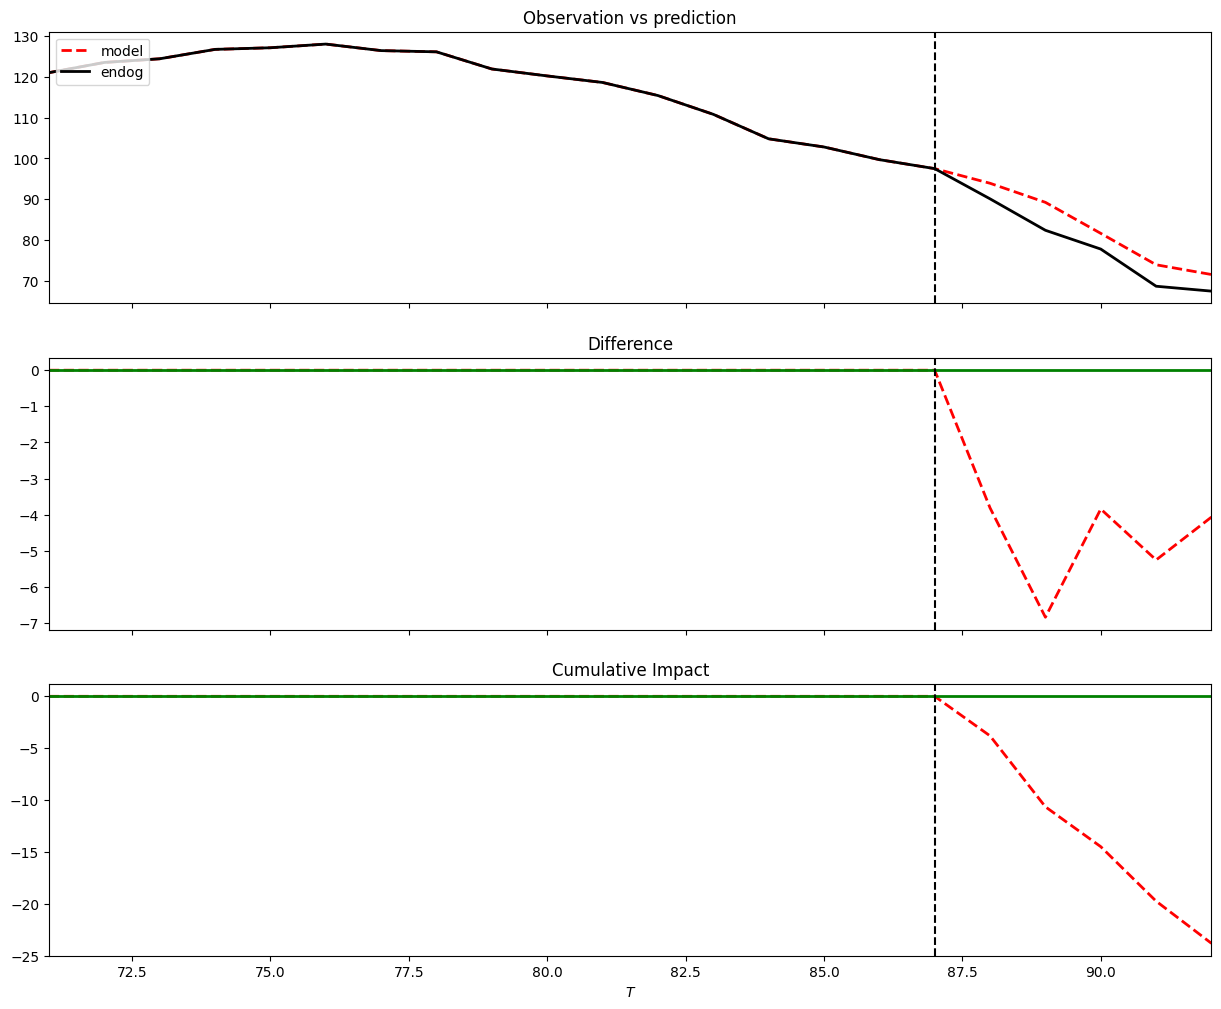

In [36]:
y = cigar[cigar.state == 5][['year', 'sales']].set_index('year')
y.columns = ['y']

X = pd.pivot_table(cigar[cigar.state != 5][['year', 'state', 'sales']], values='sales', index='year', columns='state').add_prefix('X_')
data = pd.concat([y, X], axis=1)

pre_period = [70, 87]
post_period = [88, 92]
ci = CausalImpact(data, pre_period, post_period, model_args={'fit_method': 'hmc'})
ci.run()
ci.plot()

In [37]:
data

,y,X_1,X_4,X_7,X_8,X_11,X_13,X_14,X_15,X_16,...,X_41,X_42,X_43,X_44,X_45,X_46,X_47,X_49,X_50,X_51
year,,,,,,,,,,,,,,,,,,,,,
70,123.0,89.8,100.3,120.0,155.0,109.9,102.4,124.8,134.6,108.5,...,103.6,92.7,99.8,106.4,65.5,122.6,124.3,114.5,106.4,132.2
71,121.0,95.4,104.1,117.6,161.1,115.7,108.5,125.6,139.3,108.4,...,115.0,96.7,106.3,108.9,67.7,124.4,128.4,111.5,105.4,131.7
72,123.5,101.1,103.9,110.8,156.3,117.0,126.1,126.6,149.2,109.4,...,118.7,103.0,111.5,108.6,71.3,138.0,137.0,117.5,108.8,140.0
73,124.4,102.9,108.0,109.3,154.7,119.8,121.8,124.4,156.0,110.6,...,125.5,103.5,109.7,110.4,72.7,146.8,143.1,116.6,109.5,141.2
74,126.7,108.2,109.7,112.4,151.3,123.7,125.6,131.9,159.6,116.1,...,129.7,108.4,114.8,114.7,75.6,151.8,149.6,119.9,111.8,145.8
75,127.1,111.7,114.8,110.2,147.6,122.9,123.3,131.8,162.4,120.5,...,130.5,113.5,117.4,116.0,75.8,155.5,152.7,123.2,113.5,160.7
76,128.0,116.2,119.1,113.4,153.0,125.9,125.1,134.4,166.6,124.4,...,136.8,116.7,121.7,121.4,77.9,171.1,158.1,129.7,115.4,161.5
77,126.4,117.1,122.6,117.3,153.3,127.9,125.0,134.0,173.0,125.5,...,137.2,115.6,124.6,124.2,78.0,169.4,157.7,133.9,117.2,160.4
78,126.1,123.0,127.3,117.5,155.5,130.6,122.8,136.7,150.9,127.1,...,140.4,116.9,127.3,126.6,79.6,162.4,155.9,131.6,116.7,160.3


In [38]:
ci.run()
print(ci.summary())

                               Average      Cumulative
Actual                              77             386
Predicted                           82             410
95% CI                        [82, 82]      [410, 410]
                                                      
Absolute Effect                     -4             -23
95% CI                        [-4, -4]      [-23, -23]
                                                      
Relative Effect                  -5.8%           -5.8%
95% CI                  [-5.8%, -5.8%]  [-5.8%, -5.8%]
                                                      
P-value                           0.0%                
Prob. of Causal Effect          100.0%                
None
